<a href="https://colab.research.google.com/github/ricky1984a/customer_analytics/blob/main/Customer_Analytics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Data loaded successfully.

First few rows of the dataset:
           Sex  Marital status  Age  Education  Income  Occupation  \
ID                                                                   
100000001    0               0   67          2  124670           1   
100000002    1               1   22          1  150773           1   
100000003    0               0   49          1   89210           0   
100000004    0               0   45          1  171565           1   
100000005    0               0   53          1  149031           1   

           Settlement size  
ID                          
100000001                2  
100000002                2  
100000003                0  
100000004                1  
100000005                1  

Dataframe Info:
<class 'pandas.core.frame.DataFrame'>
Index: 2000 entries, 100000001 to 100002000
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   Sex              2000 no

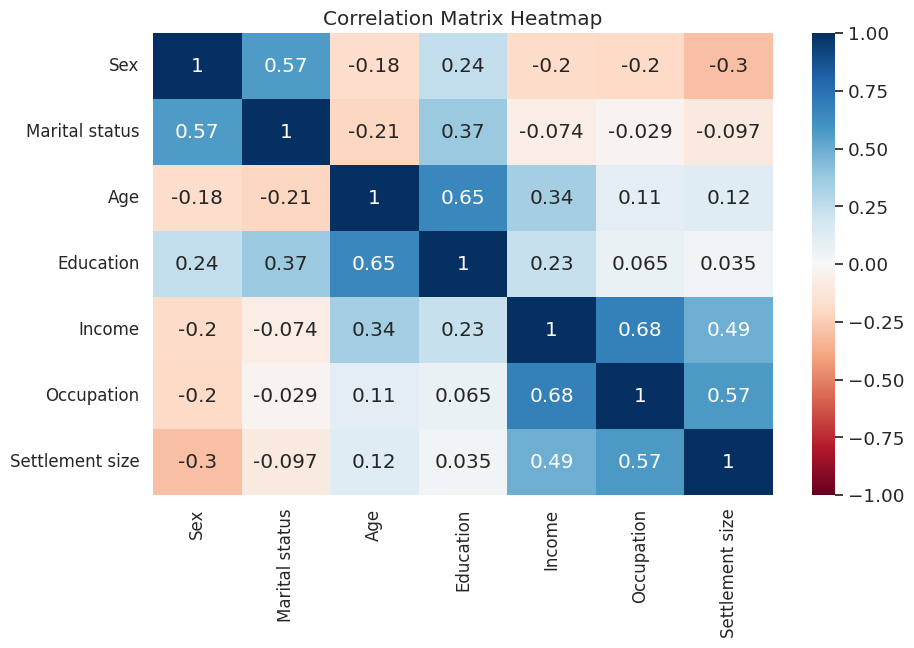

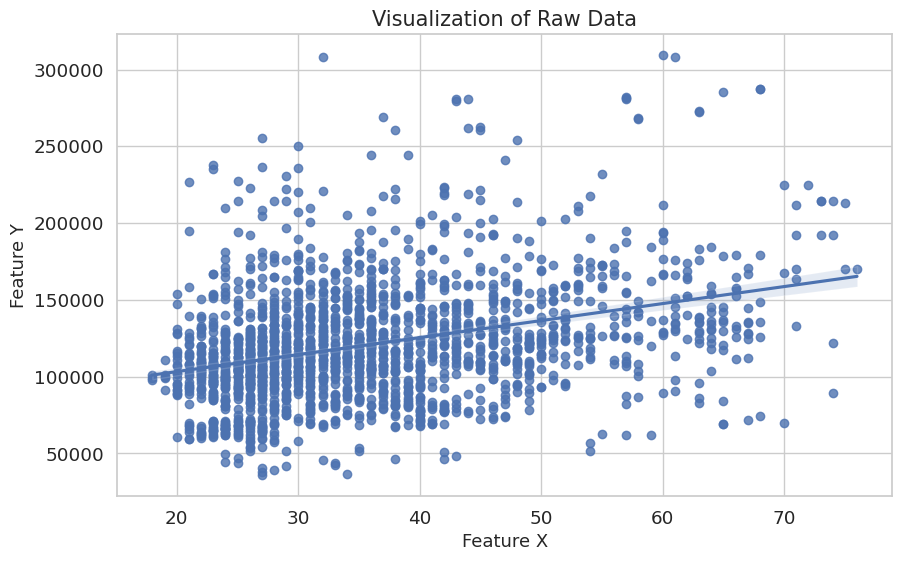


Standardizing features...
Standardization complete.


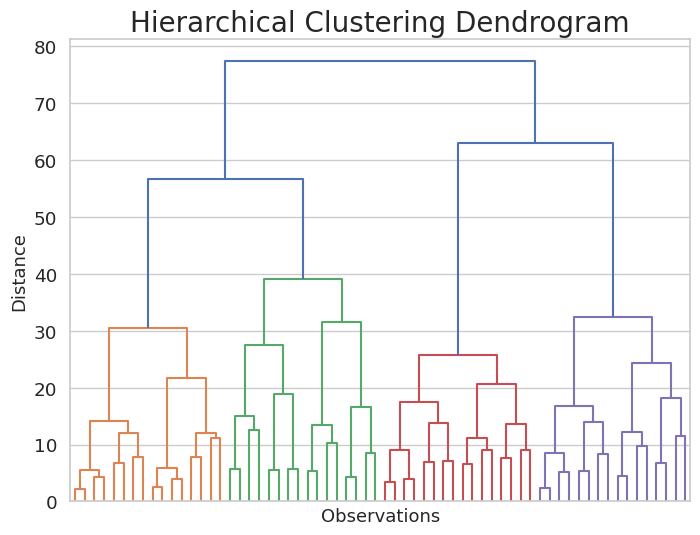

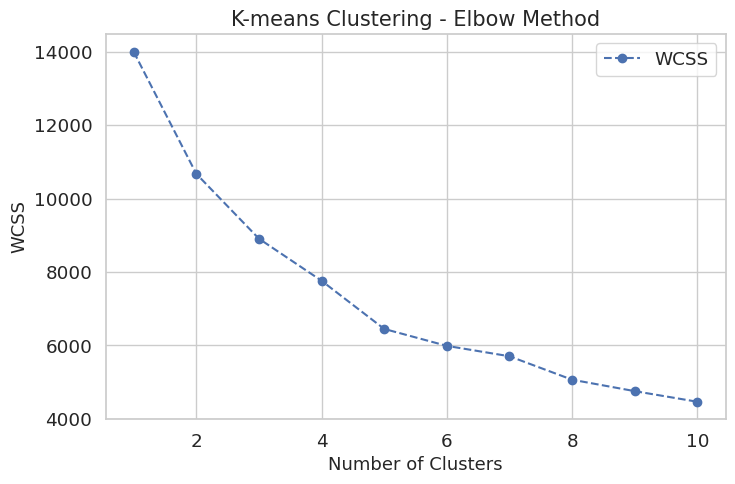

The optimal number of clusters, suggested by Elbow criterion:  5
                     Sex  Marital status        Age  Education         Income  \
Segment_KMeans                                                                  
A               0.028302        0.000000  35.418239   0.619497  100066.210692   
B               0.891705        0.652074  33.297235   1.108295   89360.076037   
C               0.748582        0.979206  27.924386   1.003781  119900.778828   
D               0.004264        0.044776  37.142857   0.710021  144048.624733   
E               0.480000        0.684000  55.648000   2.136000  161276.772000   

                Occupation  Settlement size  
Segment_KMeans                               
A                 0.393082         0.110063  
B                 0.094470         0.000000  
C                 1.052930         0.814745  
D                 1.283582         1.539446  
E                 1.184000         1.160000  
The average silhouette score for K-means clus

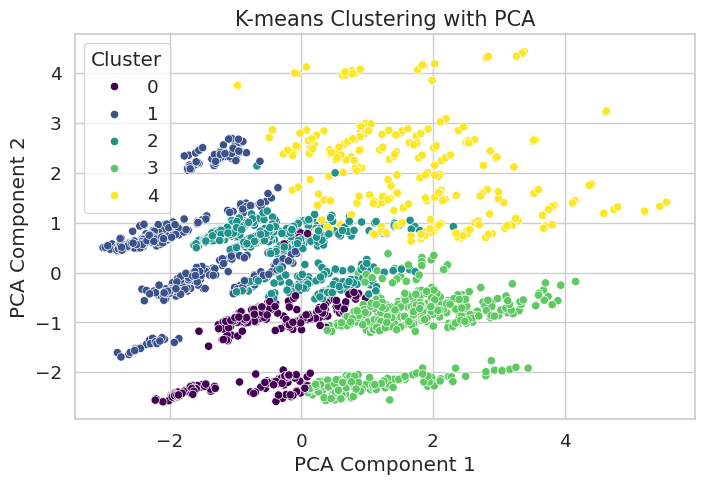

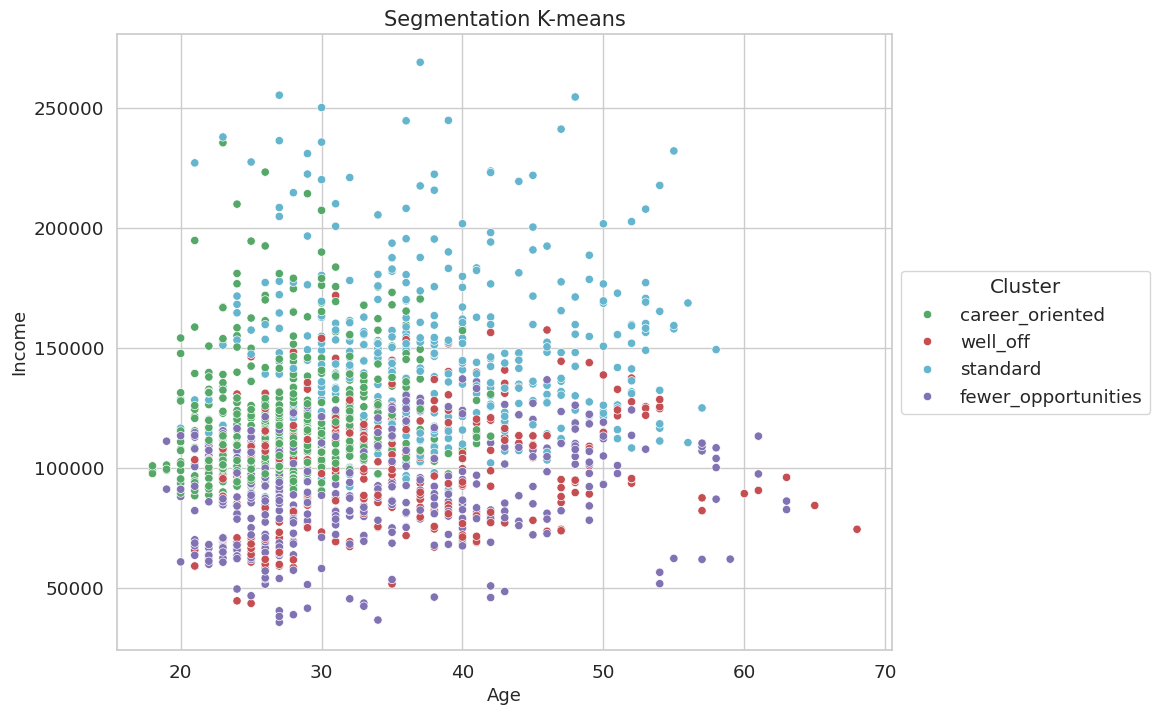

In [ ]:
import numpy as np  # Numerical computations
import pandas as pd  # Data manipulation and analysis
import matplotlib.pyplot as plt  # Plotting library
import seaborn as sns  # Statistical data visualization
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import KMeans
from kneed import KneeLocator
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA

# Configure Matplotlib and Seaborn settings
plt.rc("font", size=14)  # Set default font size for plots
plt.style.use("ggplot")  # Use ggplot style for better aesthetics
sns.set_theme(style="whitegrid", color_codes=True)  # Set default theme and color codes
sns.set_context("notebook", font_scale=1.2)  # Adjust context for better readability

# Optional: Set global random seed for reproducibility
np.random.seed(42)

# Load the data
def load_data(file_path):
    """Loads a CSV file into a pandas DataFrame."""
    try:
        df = pd.read_csv(file_path, index_col=0)
        print("Data loaded successfully.")
        return df
    except FileNotFoundError:
        print(f"Error: The file '{file_path}' was not found.")
    except pd.errors.EmptyDataError:
        print("Error: The file is empty.")
    except pd.errors.ParserError:
        print(f"Error: There was an issue with parsing the file '{file_path}'.")
    except Exception as e:
        print(f"An unexpected error occurred: {e}")
    return None

# Specify the correct raw file path from GitHub
data_file = 'https://raw.githubusercontent.com/ricky1984a/customer_analytics/main/data/segmentation_data.csv'
demo_df = load_data(data_file)

if demo_df is not None:
    # Display the first few rows of the dataframe
    print("\nFirst few rows of the dataset:")
    print(demo_df.head())

    # Display general information about the dataframe
    print("\nDataframe Info:")
    print(demo_df.info())

    # Check for duplicate rows
    duplicate_count = demo_df.duplicated().sum()
    print(f"\nNumber of duplicate rows: {duplicate_count}")

    # Drop duplicates if any
    if duplicate_count > 0:
        demo_df = demo_df.drop_duplicates()
        print(f"\nDuplicates removed. Remaining rows: {len(demo_df)}")

    # Data Exploration
    print("\nStatistical Summary:")
    print(demo_df.describe())

    # Correlation Matrix
    print("\nCorrelation Matrix:")
    correlation_matrix = demo_df.corr()
    print(correlation_matrix)

    # Visualize the correlation matrix
    plt.figure(figsize=(10, 6))
    s = sns.heatmap(correlation_matrix, annot=True, cmap='RdBu', vmin=-1, vmax=1)
    s.set_yticklabels(s.get_yticklabels(), rotation=0, fontsize=12)
    s.set_xticklabels(s.get_xticklabels(), rotation=90, fontsize=12)
    plt.title("Correlation Matrix Heatmap")
    plt.show()

    # Scatter plot with regression line
    plt.figure(figsize=(10, 6))
    sns.regplot(x=demo_df.iloc[:, 2], y=demo_df.iloc[:, 4])
    plt.xlabel('Feature X', fontsize=13)  # Replace with the correct feature name
    plt.ylabel('Feature Y', fontsize=13)  # Replace with the correct feature name
    plt.title('Visualization of Raw Data', fontsize=15)
    plt.show()

    # Standardization
    print("\nStandardizing features...")
    scaler = StandardScaler()
    scaled_data = scaler.fit_transform(demo_df.select_dtypes(include=[np.number]))
    scaled_df = pd.DataFrame(scaled_data, columns=demo_df.select_dtypes(include=[np.number]).columns)
    print("Standardization complete.")

    # Hierarchical Clustering
    hier_clust = linkage(scaled_data, method='ward')
    plt.figure(figsize=(8, 6))
    plt.title('Hierarchical Clustering Dendrogram', fontsize=20)
    plt.ylabel('Distance', fontsize=13)
    plt.xlabel('Observations', fontsize=13)
    dendrogram(hier_clust, show_leaf_counts=False, truncate_mode='level', p=5, no_labels=True)
    plt.show()

    # K-means Clustering - Elbow Method
    wcss = {}
    for i in range(1, 11):
        kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
        kmeans.fit(scaled_data)
        wcss[i] = kmeans.inertia_

    # Elbow Method Plot
    plt.figure(figsize=(8, 5))
    plt.plot(list(wcss.keys()), list(wcss.values()), marker='o', linestyle='--', label="WCSS")
    plt.xlabel('Number of Clusters', fontsize=13)
    plt.ylabel('WCSS', fontsize=13)
    plt.title('K-means Clustering - Elbow Method', fontsize=15)
    plt.legend()
    plt.show()

    # KneeLocator to find the optimal number of clusters
    x, y = list(wcss.keys()), list(wcss.values())
    kn = KneeLocator(x, y, curve='convex', direction='decreasing')
    print('The optimal number of clusters, suggested by Elbow criterion: ', kn.knee)

    # K-means Clustering with Optimal Clusters
    optimal_clusters = kn.knee if kn.knee else 5  # Default to 5 if KneeLocator fails
    kmeans = KMeans(n_clusters=optimal_clusters, max_iter=500, init='k-means++', random_state=42)
    kmeans.fit(scaled_data)

    # Results: K-means Clustering
    df_segm_kmeans = demo_df.copy()
    df_segm_kmeans['Segment_KMeans'] = kmeans.labels_
    df_segm_kmeans['Segment_KMeans'] = df_segm_kmeans['Segment_KMeans'].replace({i: chr(65 + i) for i in range(optimal_clusters)})
    df_segm_analysis = df_segm_kmeans.groupby(['Segment_KMeans']).mean()
    print(df_segm_analysis)

    # Silhouette Score
    silhouette_avg = silhouette_score(scaled_data, kmeans.labels_)
    print(f"The average silhouette score for K-means clustering: {silhouette_avg:.2f}")

    # PCA for Visualization
    pca = PCA(n_components=2)
    pca_data = pca.fit_transform(scaled_data)
    plt.figure(figsize=(8, 5))
    sns.scatterplot(x=pca_data[:, 0], y=pca_data[:, 1], hue=kmeans.labels_, palette='viridis')
    plt.title('K-means Clustering with PCA', fontsize=15)
    plt.xlabel('PCA Component 1')
    plt.ylabel('PCA Component 2')
    plt.legend(title='Cluster')
    plt.show()

    # Corrected Scatter Plot for Segmentation
    df_segm_kmeans['Labels'] = df_segm_kmeans['Segment_KMeans'].map({'A': 'well_off', 'B': 'fewer_opportunities',
                                                                     'C': 'career_oriented', 'D': 'standard'})
    plt.figure(figsize=(10, 8))
    sns.scatterplot(x='Age', y='Income', hue='Labels', data=df_segm_kmeans, palette=['g', 'r', 'c', 'm'])
    plt.title('Segmentation K-means', fontsize=15)
    plt.legend(bbox_to_anchor=(1, 0.5), loc='center left', title="Cluster")
    plt.xlabel('Age', fontsize=13)
    plt.ylabel('Income', fontsize=13)
    plt.grid(True)
    plt.show()

else:
    print("No data to process.")


In [ ]:
!pip install kneed
